#**Usage of drive**
First step is to load the drive where we have the datasets.


In [ ]:
import os
from google.colab import drive 
drive.mount('/content/drive') 
import pandas as pd
import glob

Mounted at /content/drive


In [ ]:
pd.options.display.max_colwidth = 200

#**Read data from the dataset**
Now, we proceed to read the data from dataset and remove useless data for clustering. 

In [ ]:
path = r'/content/drive/MyDrive/data-mining/OnlineClustering/balanced-csv' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, encoding='ISO-8859-1', header=0)
    li.append(df)

trainingFrame = pd.concat(li, axis=0, ignore_index=True)
print ("Training data set ready")
#Delete unrelevant data from DT
trainingFrame.drop(trainingFrame.columns[[1,2,3,4,5,6,8,9]], axis=1,inplace=True)

testingFrame = pd.read_csv('/content/drive/MyDrive/data-mining/OnlineClustering/test/test.csv', index_col=None, encoding='ISO-8859-1', header=0)
#Delete unrevelant data from DT
testingFrame.drop(testingFrame.columns[[1,2,3,4,5,6,8,9]], axis=1,inplace=True)
print("Testing data set ready")

Training data set ready
Testing data set ready


In [ ]:
testingFrame.head(10)

,tweet_id,tweet_text
0,'591903085670215681',"Dua's for all those affected by the earthquakes in India,Nepal &amp; Bhutan. Stay safe &amp; help others in any form. #Equake http://t.co/M6YG0k4FKh"
1,'511481629932785664',Odile's Remnants Could Bring More Flooding to the Southwest http://t.co/3jLTwTl56i
2,'503956894495436801',Iceland Evacuates Area Near Bardabunga Volcano Over Eruption Concerns http://t.co/l0W3vQqjhJ #socialmedia #SMS
3,'474176288924925952',Malaysian man comes up short after buying &amp;pound;100 penis enlarger... http://t.co/RTbiJI3HFS #WhereIsTheFuckingPlane.com #MH370
4,'460399646729601024',"Scary time friends, MERS (Middle East Respiratory Syndrome) took more lives we all must need to be careful friends....!!!"
5,'541099467320356864',Rains Lash Disaster-Weary Philippines as Typhoon Nears #World #Politics http://t.co/Ldv0mOef9x
6,'575736803677761536',"Advice from BOM: Cyclone Nathan category 2, moving slowly southwest towards the coast #tcnathan #TCNathan #bigwet http://t.co/tfV7pfhPNJ"


#**Preprocessing tweets**

The next functions allow to pre-process each tweet in order to extract stop words, remove short and useless words, and also to apply a normalization strategy such as lemmatization and stemming. 

In [ ]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

nltk.download('stopwords')
from nltk.corpus import stopwords 
import re
import string


nltk.download('wordnet')
  
lemmatizer = WordNetLemmatizer() 

tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

#stemmer = PorterStemmer()
stemmer = SnowballStemmer("english") #snowball is faster, improvement of Porter stemmer

stop_words_en = set(stopwords.words('english')) 
stop_words_es = set(stopwords.words('spanish')) 
excluded = set(string.punctuation.replace('#','').replace('@',''))

def stopWordsTextEnglish(word_tokens):
  words_filtered_en = [w for w in word_tokens if not w in stop_words_en]
  return words_filtered_en
  
def stopWordsTextSpanish(word_tokens):
  words_filtered_es = [w for w in word_tokens if not w in stop_words_es]
  return words_filtered_es

def tokenizeTweet(text):
  out_ = ''

  #No url
  text = re.sub(r"http\S+", "", text)
  
  #Remove numbers from tweet
  text = re.sub(r'\d+', '', text)

  #Replace # with empty
  text = text.replace(' # ','')

  #Remove symbols from tweet
  text = re.sub(r'\W', ' ', text)
  #text = "".join([char.lower() for char in text if char not in excluded]) 
  
  # remove all single characters
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

  # Remove single characters from the start
  text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

  #No double space
  text = re.sub('\s+', ' ', text).strip()

  #Remove short words
  text = re.sub(r'\b\w{1,3}\b', '', text)

  terms = tknzr.tokenize(text)

  words_filtered_en = stopWordsTextEnglish(terms)
  words_filtered_es = stopWordsTextEnglish(terms)

  for token in words_filtered_es:
      out_ += lemmatizer.lemmatize(token.lower()) + " "
      #out_ += stemmer.stem(token.lower()) + " "
  return out_

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
s1 = '@remy: #earthquake This 4 . # is waaaaayyyy too much for yo!!!!!! https://mail.google.com/mail/u/0/#inbox'

text= tokenizeTweet(s1)
tknzr.tokenize(text)

['remy', 'earthquake', 'this', 'waaayyy', 'much']

In [ ]:
tweets_preprocessed = []
for tweet in trainingFrame.iloc[:, 1]:
  tweets_preprocessed.append(tokenizeTweet(tweet))

print(len(tweets_preprocessed))
trainingFrame['tweets_preprocessed'] = tweets_preprocessed

print(trainingFrame.shape)

tweets_preprocessed = []
for tweet in testingFrame.iloc[:, 1]:
  tweets_preprocessed.append(tokenizeTweet(tweet))
testingFrame['tweets_preprocessed'] = tweets_preprocessed

2553
(2553, 3)


In [ ]:
trainingFrame.iloc[:, 1].head(10) #These are the tweets without any manipulation

0                        Let's all keep Chile and our friends in our thoughts and prayers #chile #earthquake
1                      Residents flee 8.2 magnitude earthquake strikes northern Chile http://t.co/g24JIoWRhD
2                                                              Our thoughts are with you. #PrayForChile __F
3    Powerful 8.2-magnitude earthquake off Chile kills at least 5, forces evacuations http://t.co/JREYgI1Pgd
4                                                                                  pray for Chile.. #tsunami
5        Tsunami-triggering earthquake strikes Chile,kills 5, releases 300åÊprisoners http://t.co/Kwb4WXNDi0
6                                                                8,2 SR earthquake and tsunami #prayforChile
7                                                                                    #PrayForChile stay safe
8                          Chile Earthquake: Deadly Magnitude-8.2 Temblor Rocks Coast http://t.co/p0XhkZgumN
9                  

In [ ]:
trainingFrame['tweets_preprocessed'].head(10) #These are the tweets preprocessed at training data

0                      keep chile friend thought prayer chile earthquake 
1               resident flee magnitude earthquake strike northern chile 
2                                                   thought prayforchile 
3        powerful magnitude earthquake chile kill least force evacuation 
4                                                     pray chile tsunami 
5    tsunami triggering earthquake strike chile kill release åêprisoners 
6                                        earthquake tsunami prayforchile 
7                                                 prayforchile stay safe 
8                   chile earthquake deadly magnitude temblor rock coast 
9                 magnitude earthquake causing person death prayforchile 
Name: tweets_preprocessed, dtype: object

In [ ]:
testingFrame['tweets_preprocessed'].head(10) #These are the tweets preprocessed at testing data

0                         affected earthquake india nepal bhutan stay safe help others form equake 
1                                                odile remnant could bring more flooding southwest 
2                 iceland evacuates area near bardabunga volcano over eruption concern socialmedia 
3                          malaysian come short buying pound penis enlarger whereisthefuckingplane 
4       scary time friend mers middle east respiratory syndrome took life must need careful friend 
5                                 rain lash disaster weary philippine typhoon nears world politics 
6    advice cyclone nathan category moving slowly southwest towards coast tcnathan tcnathan bigwet 
Name: tweets_preprocessed, dtype: object

# Vectorizing the tweets

Now we proceed to vectorize the pre-processed tweets. Following the paper, we should implement an Tf-Idf vectorizer and generate for each tweet a vector represenation. The paper doesn't give any specification on which other feature to use on the vectorizer. Because of that, we took different approaches in an empirical way. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english', binary=True, min_df=0.07, strip_accents='unicode', 
                             lowercase=True, sublinear_tf=True)

train = vectorizer.fit_transform(trainingFrame['tweets_preprocessed'])
test = vectorizer.transform(testingFrame['tweets_preprocessed'])
print(vectorizer.get_feature_names())
print(train.shape)

['chile', 'cyclone', 'earthquake', 'hagupit', 'iceland', 'mers', 'philippine', 'typhoon', 'vanuatu', 'volcano']
(2553, 10)


In [ ]:
train_dense = train.todense()

print(type(train_dense))
print(train_dense[0])
print(train_dense[1])
print(train_dense[2])
print(train_dense[3])

<class 'numpy.matrix'>
[[0.70042404 0.         0.71372696 0.         0.         0.
  0.         0.         0.         0.        ]]
[[0.70042404 0.         0.71372696 0.         0.         0.
  0.         0.         0.         0.        ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.70042404 0.         0.71372696 0.         0.         0.
  0.         0.         0.         0.        ]]


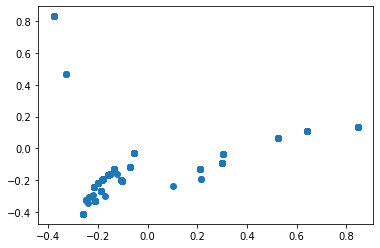

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

'''pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words = 'english', binary=True, min_df=0.07, strip_accents='unicode', 
                             lowercase=True, sublinear_tf=True)),
    ('tfidf', TfidfTransformer()),
])'''

X = train.todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()     

# Similarity calculation


According to the paper, we take the first tweet and uses it to form a cluster. For each incoming tweet, T, the algorithm computes its similarity with any existing clusters. Let C be the cluster that has the maximum similarity with T. If sim(T, C) is greater than a threshold d, which is to be determined empirically, tweet T is added to the cluster C; otherwise, a new cluster is formed based on T. We define the function sim(T, C) to be the similarity between tweet T and cluster C. 

In the clustering process, whenever a new tweet T is added to a cluster C, the centroid of C is updated as the normalized vector sum of all the tweets in C.

In the paper, they use two similarity measures: cosine similarity and
Jaccard similarity.

Mainly because of noisy nature of text and specially twitter, the algorithm could lead to a large number of clusters, many of which might not correspond to events of interest. We overcome this problem by filtering out unimportant tweets using the burst-detection module and allowing only tweets that contain bursty features to form clusters. 

We thus dramatically reduce the number of clusters and only maintain a list of topic clusters associated with realworld events.

### Cosine similarity

In [ ]:
import numpy as np
import numpy.linalg as LA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

#cosineSimilarity = lambda a, b : round(np.inner(a, b)/(LA.norm(a)*LA.norm(b)), 3)
#print(cosineSimilarity(train.toarray()[0], test.toarray()[0]))

group = []
CosineGroup = []
CosineTweet = []
def onlineClusterCosineAlgorithm(tweets):
  centroids = np.zeros(shape=(1,tweets[0].shape[1]))
  NTweets = np.zeros(shape=(1,1))
  #Assign first tweet as a new cluster
  centroids = np.vstack((centroids, tweets[0]))
  centroids = np.delete(centroids, 0, 0)

  print(tweets.shape)

  NTweets = np.vstack((NTweets, 1))
  NTweets = np.delete(NTweets, 0, 0)
  for tweet in tweets:
    distanceValue = cosine_similarity(tweet, centroids)
    
    maxValue = np.amax(distanceValue[0])
    maxIndex = np.where(distanceValue[0] == maxValue)[0][0]
    if(maxValue>0.2):
      centroids[maxIndex] = (tweet + centroids[maxIndex]) / 2.0
      NTweets[maxIndex] = NTweets[maxIndex] + 1
      group.append(maxIndex)
      CosineGroup.append(maxIndex)
      CosineTweet.append(tweet)
    else:
      if(np.count_nonzero(tweet)>0):
        centroids = np.vstack((centroids, tweet))
        NTweets = np.vstack((NTweets, 1))
        CosineGroup.append(centroids.shape[1])
        group.append(centroids.shape[1])
        CosineTweet.append(tweet)
      else:
        group.append(-1)
  print("# centroids ", centroids.shape)
  return centroids, NTweets

centroides, NTweets = onlineClusterCosineAlgorithm(train.todense())
NTweets

(2553, 10)
# centroids  (8, 10)


array([[404.],
       [ 18.],
       [293.],
       [163.],
       [413.],
       [187.],
       [187.],
       [191.]])

In [ ]:
trainingFrame['cluster'] = group
trainingFrame = trainingFrame.sort_values('cluster', ascending=False)
print(trainingFrame[['tweet_id', 'tweets_preprocessed', 'cluster']].groupby(['cluster']).agg(['count']))

        tweet_id tweets_preprocessed
           count               count
cluster                             
-1           698                 698
 0           403                 403
 1            17                  17
 2           292                 292
 3           162                 162
 4           412                 412
 5           186                 186
 6           186                 186
 7           190                 190
 10            7                   7


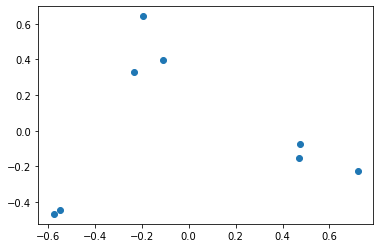

In [ ]:
X = centroides

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()     

In [ ]:
x = np.array(CosineTweet)
x = np.squeeze(x)

cosineDf = pd.DataFrame()
from sklearn import metrics
cosineDf['tweets'] = CosineTweet
cosineDf['cluster'] = CosineGroup

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, cosineDf['cluster'], metric='sqeuclidean'))

Silhouette Coefficient: 0.596


### Jaccard similarity calculation



In [ ]:
def jacc_similarity(vector1, vector2):
    jacc_num = 0
    jacc_den = len(vector1)
    for index in vector1:
        if index in vector2:
            jacc_num += 1
            jacc_den -= 1
    jacc_den += len(vector2)
    return jacc_num / jacc_den

JaccGroup = []
JackTweet = []
JackCluster = []
def onlineClusterJaccardAlgorithm(tweets):
  centroids = np.zeros(shape=(1,tweets[0].shape[1]))
  NTweets = np.zeros(shape=(1,1))

  #Assign first tweet as a new cluster
  centroids = np.vstack((centroids, tweets[0]))
  centroids = np.delete(centroids, 0, 0)

  NTweets = np.vstack((NTweets, 1))
  NTweets = np.delete(NTweets, 0, 0)
  for tweet in tweets:
    count = -1
    maxIndex = -1
    similarity =-1
    for centroid in centroids:
      wordsCentroid = np.where(centroid != 0)[1]
      wordsTweet = np.where(tweet != 0)[1]
      count+=1
      if(len(wordsCentroid)!=0):
        value = jacc_similarity(wordsTweet, wordsCentroid)
        if(value > similarity):
          similarity = value
          maxIndex = count
    
    if(similarity>0.2):
      centroids[maxIndex] = (tweet + centroids[maxIndex]) / 2.0
      NTweets[maxIndex] = NTweets[maxIndex] + 1
      JaccGroup.append(maxIndex)
      JackCluster.append(maxIndex)
      JackTweet.append(tweet)
    else:
      if(np.count_nonzero(tweet)>0):
        centroids = np.vstack((centroids, tweet))
        NTweets = np.vstack((NTweets, 1))
        JaccGroup.append(centroids.shape[1])
        JackCluster.append(maxIndex)
        JackTweet.append(tweet)
      else:
        JaccGroup.append(-1)
    #print("Similarity: ",similarity)
    #print("Centroid: ",maxIndex)
  print("# centroids jaccard: ", centroids.shape)
  return centroids, NTweets

JaccCentroides, JaccNTweets = onlineClusterJaccardAlgorithm(train.todense())
JaccNTweets

# centroids jaccard:  (7, 10)


array([[416.],
       [302.],
       [319.],
       [232.],
       [257.],
       [ 81.],
       [249.]])

In [ ]:
trainingFrame['Jackcluster'] = JaccGroup
trainingFrame = trainingFrame.sort_values('Jackcluster', ascending=False)
print(trainingFrame[['tweet_id', 'tweets_preprocessed', 'Jackcluster']].groupby(['Jackcluster']).agg(['count']))

            tweet_id tweets_preprocessed
               count               count
Jackcluster                             
-1               698                 698
 0               415                 415
 1               301                 301
 2               318                 318
 3               231                 231
 4               256                 256
 5                80                  80
 6               248                 248
 10                6                   6


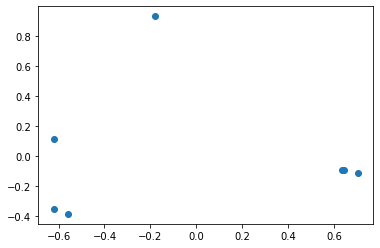

In [ ]:
X = JaccCentroides

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()     

In [ ]:
t = np.array(JackTweet)
t = np.squeeze(t)

jaccDf = pd.DataFrame()

jaccDf['tweets'] = JackTweet
jaccDf['cluster'] = JackCluster

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(t, jaccDf['cluster'], metric='sqeuclidean'))

Silhouette Coefficient: 0.643


# Other clustering algorithms

In [ ]:
from sklearn.cluster import KMeans

kMeansClustering = KMeans(n_clusters=7, init='k-means++', n_init=30, max_iter=250, random_state=42)
preds = kMeansClustering.fit_predict(train.todense())

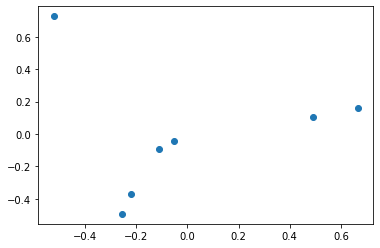

In [ ]:
X = kMeansClustering.cluster_centers_

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()     

In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(train.todense(), preds, metric='sqeuclidean'))

Silhouette Coefficient: 0.755


# Results of algorithms

In [ ]:
print("Number of clusters Cosine: ",len(centroides))
for centroid in centroides:
  count = 0
  out = ''
  for word in np.where(centroid != 0)[1]:
    out = out + " "+vectorizer.get_feature_names()[word]
  print(out)

Number of clusters Cosine:  8
 chile earthquake
 earthquake volcano
 mers philippine
 cyclone hagupit philippine typhoon
 cyclone hagupit philippine typhoon vanuatu
 earthquake typhoon vanuatu volcano
 earthquake iceland volcano
 cyclone earthquake iceland philippine volcano


In [ ]:
print("Number of clusters Jaccard: ",len(JaccCentroides))
for centroid in JaccCentroides:
  count = 0
  out = ''
  for word in np.where(centroid != 0)[1]:
    out = out + " "+vectorizer.get_feature_names()[word]
  print(out)

Number of clusters Jaccard:  7
 chile earthquake vanuatu
 mers philippine
 cyclone philippine typhoon vanuatu
 cyclone earthquake iceland vanuatu volcano
 earthquake iceland volcano
 philippine volcano
 cyclone hagupit philippine typhoon


In [ ]:
print("Number of clusters KMeans: ",len(kMeansClustering.cluster_centers_))
for centroid in kMeansClustering.cluster_centers_:
  count = 0
  out = ''
  for word in np.where(centroid > 0)[0]:
    out = out + " "+vectorizer.get_feature_names()[word]
  print(out)

Number of clusters KMeans:  7
 cyclone earthquake hagupit iceland mers philippine typhoon volcano
 chile earthquake philippine typhoon volcano
 chile cyclone earthquake mers philippine typhoon volcano
 cyclone earthquake iceland mers volcano
 earthquake iceland mers philippine typhoon volcano
 earthquake hagupit iceland mers typhoon vanuatu volcano
 cyclone earthquake hagupit iceland mers typhoon vanuatu volcano
